<a href="https://colab.research.google.com/github/gloriabee/ML_Engineer_Journey/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations and configurations

1.   Install Python
2.   Install Visual Studio Code
3.   Install Scikit-learn
4.   Install Jupyter Notebook

In [1]:
print('Hello Notebook')

Hello Notebook


In [3]:
import numpy as np
a=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a[0])

[1 2 3 4]


## First Linear Regression Project in Python

**matplotlib**.useful graphing tool

**numpy**  useful library for handling numeric data in Python.

**sklearn** Scikit-learn library.

In [4]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, model_selection

### Loading Data(X,y) from datasets

In [35]:
X,y= datasets.load_diabetes(return_X_y=True)

In [19]:
print(X.shape)
print(X[0])

(442, 1)
[0.06169621]


### Reshaping to 2D array for plotting

In [20]:
#Extract the column at index 2
# X= X[:,2]

#Reshape to a 2D array
X = X.reshape((-1,1))

### Train,Test Split

In [21]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.33)

### Training Model

In [26]:
model= linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Predicting

In [27]:
y_pred= model.predict(X_test)

### How good is our prediction

Text(0.5, 1.0, 'A Graph Plot Showing Diabetes Progression Against BMI')

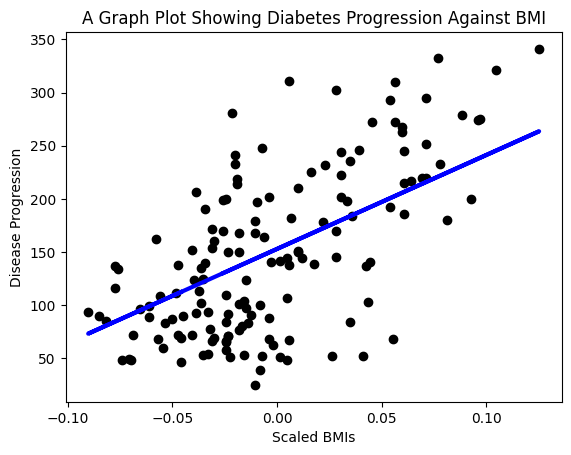

In [33]:
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred,color='blue',linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')

## How to analyze and clean a dataset

### Checking for missing dates

In [39]:
import pandas as pd
pumpkins= pd.read_csv('/content/US-pumpkins.csv')
pumpkins.head()
#viewing the last 5 rows
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


In [40]:
pumpkins.isnull().sum()

,0
City Name,0
Type,1712
Package,0
Variety,5
Sub Variety,1461
Grade,1757
Date,0
Low Price,0
High Price,0
Mostly Low,103


In [44]:
#selecting the columns we need
columns_to_select= ['Package','Low Price','High Price',
'Date']
pumpkins=pumpkins.loc[:,columns_to_select]
pumpkins.head()

,Package,Low Price,High Price,Date
0,24 inch bins,270.0,280.0,4/29/17
1,24 inch bins,270.0,280.0,5/6/17
2,24 inch bins,160.0,160.0,9/24/16
3,24 inch bins,160.0,160.0,9/24/16
4,24 inch bins,90.0,100.0,11/5/16


### Determine average price of pumpkin

In [50]:
# find the average price of pumpkin
price= (pumpkins['High Price']+pumpkins['Low Price'])/2
#extracting month from date
month= pd.DatetimeIndex(pumpkins['Date']).month

(1757, 4)

In [55]:
# converting into a fresh Pandas dataframe
new_pumpkins= pd.DataFrame({'Month':month,'Package':pumpkins['Package'],'Low Price':pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00
1756,9,36 inch bins,275.00,275.00,275.00


In [56]:
pumpkins= pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]

In [58]:
pumpkins.head()

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.0,15.0,9/24/16
71,1 1/9 bushel cartons,18.0,18.0,9/24/16
72,1 1/9 bushel cartons,18.0,18.0,10/1/16
73,1 1/9 bushel cartons,17.0,17.0,10/1/16
74,1 1/9 bushel cartons,15.0,15.0,10/8/16


In [61]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [60]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


### Visualization Strategies

In [62]:
import matplotlib.pyplot as plt

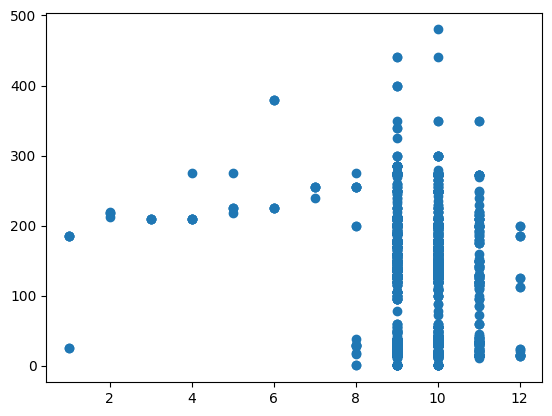

In [68]:
price=new_pumpkins.Price
month=new_pumpkins.Month
plt.scatter(month,price)


**Using scatter plot is not useful**

Text(0, 0.5, 'Pumpkin price')

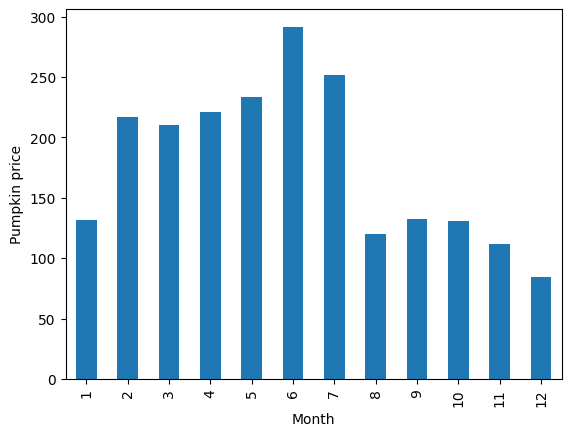

In [70]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin price')